In [1]:
%pip install pandas matplotlib tensorflow[and-cuda] scikit-learn --quiet


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import psutil
import os

# Modelos de machine learning
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


In [3]:
path = "../dados_convergencia/0.09600000000000002_121M_100.csv"
dataframe = pd.read_csv(path)
dataframe.head()

,qtd_roteadores,tempo_convergencia,soma_rx,mediana_rx,soma_tx,mediana_tx
0,10,7.546356,1793,174,609,61
1,20,8.349132,4174,200,1779,86
2,30,9.117855,7102,245,3509,117
3,40,9.889131,11247,288,6612,169
4,50,11.824526,17331,337,11436,225


In [4]:
import os
import psutil
import pandas as pd

# Recursos totais do sistema
total_ram_gb = psutil.virtual_memory().total / 1e9
total_cores = psutil.cpu_count()
print(f"Recursos do sistema: {total_ram_gb:.2f} GB RAM, {total_cores} núcleos CPU")

# Extrai informações do arquivo
cpu_usada = float(path.split("/")[-1].split("_")[0])
memoria_usada = float(path.split("/")[-1].split("_")[1][:-1])  # remove 'M'
qtd_roteadores = int(path.split("/")[-1].split("_")[2].split('.')[0])  # extrai 256

print(f"Número de roteadores na simulação: {qtd_roteadores}")
print(f"CPU total utilizada: {cpu_usada:.6f} cores ({cpu_usada/total_cores*100:.2f}% do sistema)")
print(f"Memória total utilizada: {memoria_usada:.2f} MB ({memoria_usada/(total_ram_gb*1000)*100:.4f}% do sistema)")

Recursos do sistema: 15.94 GB RAM, 12 núcleos CPU
Número de roteadores na simulação: 100
CPU total utilizada: 0.096000 cores (0.80% do sistema)
Memória total utilizada: 121.00 MB (0.7590% do sistema)


In [5]:
# Tratamento para qtd_roteadores repetido
df_mediana = dataframe.groupby('qtd_roteadores', as_index=False).median()
df_mediana.head()

,qtd_roteadores,tempo_convergencia,soma_rx,mediana_rx,soma_tx,mediana_tx
0,10,7.546356,1793.0,174.0,609.0,61.0
1,20,8.349132,4174.0,200.0,1779.0,86.0
2,30,9.117855,7102.0,245.0,3509.0,117.0
3,40,9.889131,11247.0,288.0,6612.0,169.0
4,50,11.824526,17331.0,337.0,11436.0,225.0


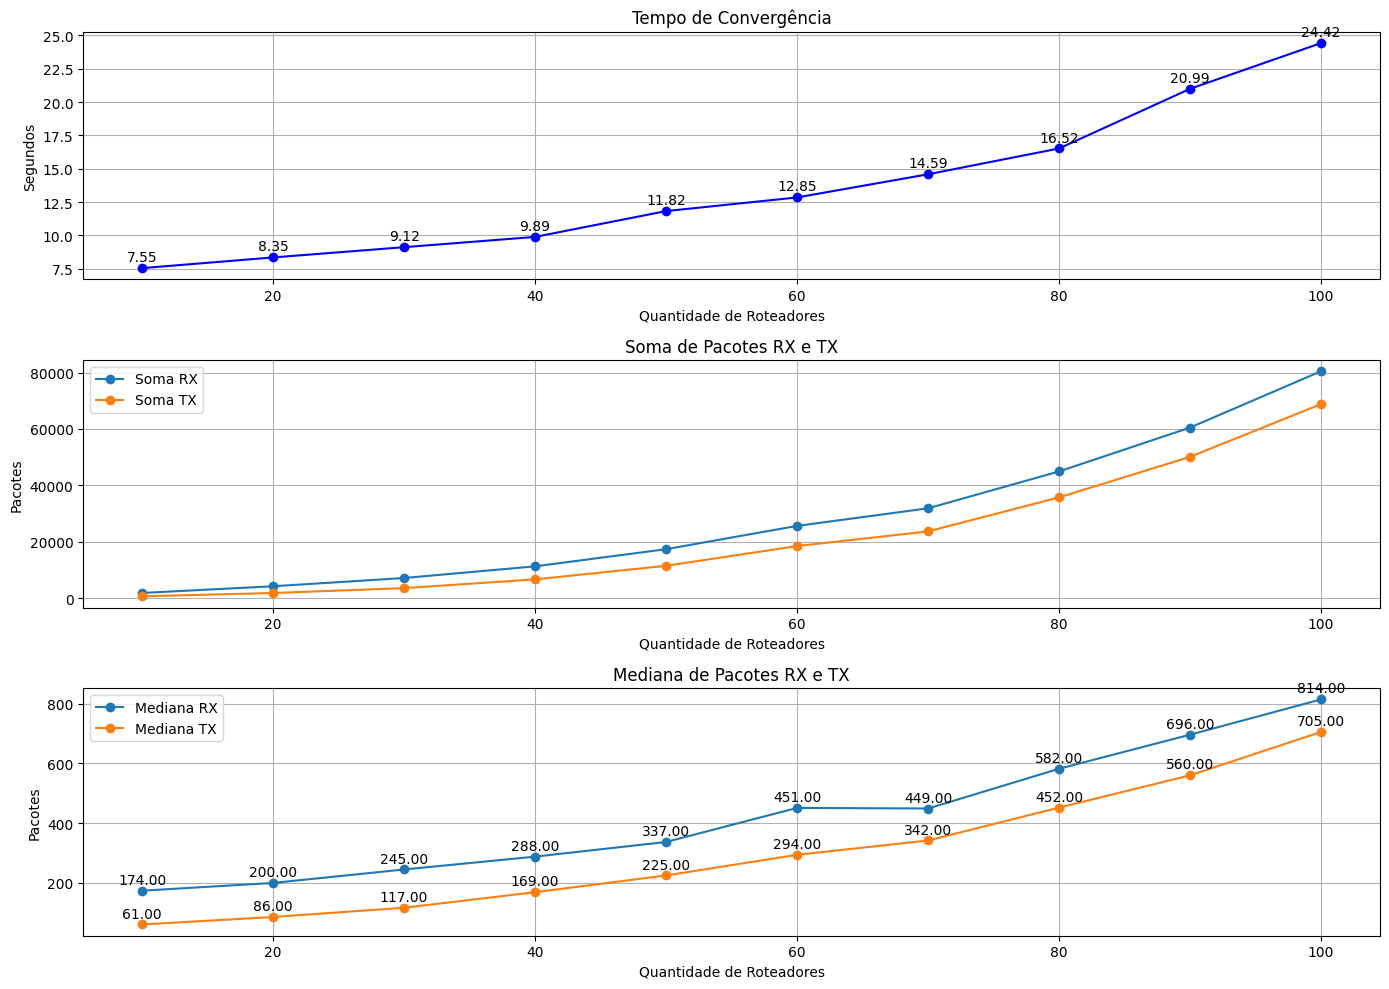

In [6]:
fig, axs = plt.subplots(3, 1, figsize=(14, 10))
qtd = df_mediana['qtd_roteadores']

# Gráfico 1: Tempo de Convergência
axs[0].plot(qtd, df_mediana['tempo_convergencia'], marker='o', color='blue', label='Tempo de Convergência')
axs[0].set_title('Tempo de Convergência')
axs[0].set_xlabel('Quantidade de Roteadores')
axs[0].set_ylabel('Segundos')
axs[0].grid(True)

for i, row in df_mediana.iterrows():
    axs[0].annotate(
        f"{row['tempo_convergencia']:.2f}", 
        (row['qtd_roteadores'], row['tempo_convergencia']),
        textcoords="offset points", 
        xytext=(0,5), 
        ha='center'
    )

# Gráfico 2: Soma RX vs TX
axs[1].plot(qtd, df_mediana['soma_rx'], marker='o', label='Soma RX')
axs[1].plot(qtd, df_mediana['soma_tx'], marker='o', label='Soma TX')
axs[1].set_title('Soma de Pacotes RX e TX')
axs[1].set_xlabel('Quantidade de Roteadores')
axs[1].set_ylabel('Pacotes')
axs[1].set_xticks
axs[1].legend()
axs[1].grid(True)

# Gráfico 3: Mediana RX vs TX
axs[2].plot(qtd, df_mediana['mediana_rx'], marker='o', label='Mediana RX')
axs[2].plot(qtd, df_mediana['mediana_tx'], marker='o', label='Mediana TX')
axs[2].set_title('Mediana de Pacotes RX e TX')
axs[2].set_xlabel('Quantidade de Roteadores')
axs[2].set_ylabel('Pacotes')

axs[2].legend()
axs[2].grid(True)


for i, row in df_mediana.iterrows():
    axs[2].annotate(
        f"{row['mediana_rx']:.2f}", 
        (row['qtd_roteadores'], row['mediana_rx']),
        textcoords="offset points", 
        xytext=(0,5), 
        ha='center'
    )
    
    axs[2].annotate(
        f"{row['mediana_tx']:.2f}", 
        (row['qtd_roteadores'], row['mediana_tx']),
        textcoords="offset points", 
        xytext=(0,5), 
        ha='center'
    )

plt.tight_layout()
plt.show()


In [7]:
dataframe_ia = df_mediana.drop(columns=['soma_rx', 'soma_tx', 'mediana_rx', 'mediana_tx'])
dataframe_ia.head()

,qtd_roteadores,tempo_convergencia
0,10,7.546356
1,20,8.349132
2,30,9.117855
3,40,9.889131
4,50,11.824526


In [8]:
x = dataframe_ia.drop(columns=['tempo_convergencia'])
y = dataframe_ia['tempo_convergencia']

In [9]:
model = make_pipeline(
    PolynomialFeatures(degree=2),
    LinearRegression()
)
model.fit(x, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [10]:
dataframe_prev = pd.DataFrame({'qtd_roteadores': np.arange(10, 200, 10)})
predictions = model.predict(dataframe_prev)

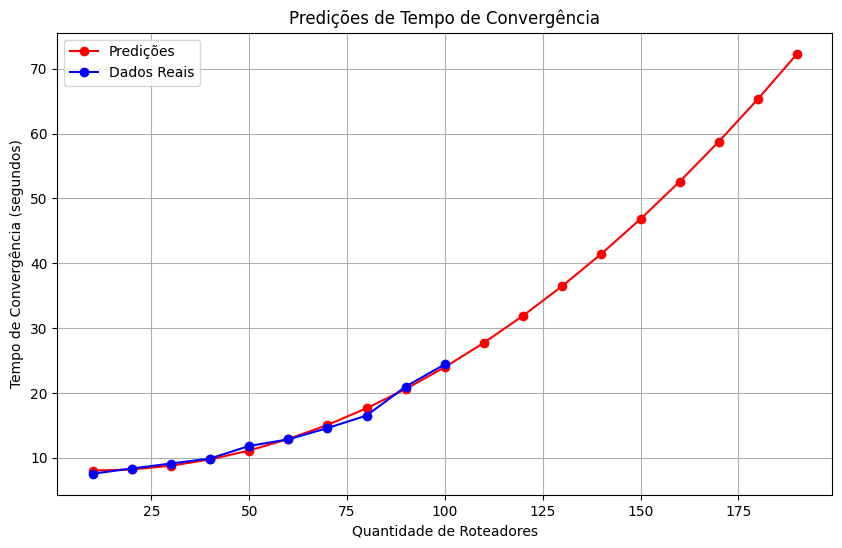

In [11]:
def plot_predictions(dataframe_ia, dataframe_prev, predictions):
  df_predictions = pd.DataFrame({'qtd_roteadores': dataframe_prev['qtd_roteadores'], 'tempo_convergencia': predictions})
  df_predictions = df_predictions.sort_values(by='qtd_roteadores')
  
  plt.figure(figsize=(10, 6))
  plt.plot(df_predictions['qtd_roteadores'], df_predictions['tempo_convergencia'], marker='o', color='red', label='Predições')
  plt.plot(dataframe_ia['qtd_roteadores'], dataframe_ia['tempo_convergencia'], marker='o', color='blue', label='Dados Reais')
  plt.title('Predições de Tempo de Convergência')
  plt.xlabel('Quantidade de Roteadores')
  plt.ylabel('Tempo de Convergência (segundos)')
  plt.grid(True)
  plt.legend()
  plt.show()
  
plot_predictions(dataframe_ia, dataframe_prev, predictions)

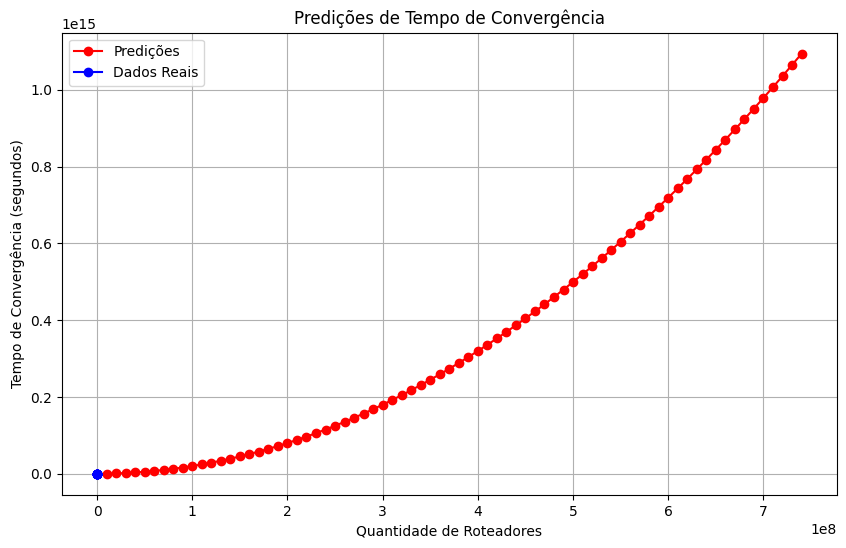

In [12]:
dataframe_prev = pd.DataFrame({'qtd_roteadores': np.arange(10, 750_000_000, 10_000_000)})
predictions = model.predict(dataframe_prev)

plot_predictions(dataframe_ia, dataframe_prev, predictions)

In [14]:
import pandas as pd
import time

def predict_convergence_times(router_quantities):
    dados = []

    for qty in router_quantities:
        data = pd.DataFrame({'qtd_roteadores': [qty]})
        prediction = model.predict(data)[0]

        if prediction < 60:
            tempo = round(prediction)
            tempo_str = f"{tempo} segundo{'s' if tempo != 1 else ''}"

        elif prediction < 3600:
            tempo = round(prediction / 60)
            tempo_str = f"{tempo} minuto{'s' if tempo != 1 else ''}"

        elif prediction < 86400:
            tempo = round(prediction / 3600)
            tempo_str = f"{tempo} hora{'s' if tempo != 1 else ''}"

        elif prediction < 31_536_000:
            tempo = round(prediction / 86400)
            tempo_str = f"{tempo} dia{'s' if tempo != 1 else ''}"

        elif prediction < 315_360_000:
            tempo = round(prediction / 31_536_000, 2)
            tempo_str = f"{tempo} ano{'s' if tempo != 1 else ''}"

        elif prediction < 3_153_600_000:
            tempo = round(prediction / 315_360_000, 2)
            tempo_str = f"{tempo} década{'s' if tempo != 1 else ''}"

        elif prediction < 31_536_000_000:
            tempo = round(prediction / 3_153_600_000, 2)
            tempo_str = f"{tempo} século{'s' if tempo != 1 else ''}"

        elif prediction < 315_360_000_000:
            tempo = round(prediction / 31_536_000_000, 2)
            tempo_str = f"{tempo} milênio{'s' if tempo != 1 else ''}"

        elif prediction < 3_153_600_000_000:
            tempo = round(prediction / 315_360_000_000, 2)
            tempo_str = f"{tempo} era{'s' if tempo != 1 else ''}"

        elif prediction < 31_536_000_000_000:
            tempo = round(prediction / 3_153_600_000_000, 2)
            tempo_str = f"{tempo} éon{'s' if tempo != 1 else ''}"
            
        else:
            tempo = round(prediction / 31_536_000_000_000, 2)
            tempo_str = f"{tempo} unidade geológica"

        dados.append({
            "Quantidade de Roteadores": f"{qty:,}",
            "Tempo Estimado": tempo_str
        })

    return pd.DataFrame(dados)


router_quantities = [
    10, 100, 200, 1_000, 10_000, 100_000,
    1_000_000, 10_000_000, 100_000_000,
    750_000_000
]

predict_convergence_times(router_quantities)

,Quantidade de Roteadores,Tempo Estimado
0,10,8 segundos
1,100,24 segundos
2,200,1 minuto
3,"1,000",33 minutos
4,"10,000",2 dias
5,"100,000",231 dias
6,"1,000,000",6.34 décadas
7,"10,000,000",6.34 milênios
8,"100,000,000",6.34 éons
9,"750,000,000",35.64 unidade geológica
